In [ ]:
!pip install tensorflow-gpu==2.8.0 # or tensorflow for CPU
!pip install keras
!pip install opencv-python
!pip install imgaug # for image augmentation



In [1]:
import json

with open('drive/MyDrive/train/garbage_dict.json', 'r') as f:
    class_dict = json.load(f)


In [2]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Input

base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(class_dict), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


58889256/58889256 [==============================] - 0s 0us/step


In [3]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Example of preparing data generators
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    directory='drive/MyDrive/train/train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Train the model
model.fit(train_generator, steps_per_epoch=50, epochs=3)  # Adjust these parameters based on your dataset size


Found 14404 images belonging to 40 classes.
Epoch 1/3
50/50 [==============================] - 3050s 61s/step - loss: 4.0807 - accuracy: 0.0338
Epoch 2/3
50/50 [==============================] - 3011s 60s/step - loss: 3.6908 - accuracy: 0.0519
Epoch 3/3
50/50 [==============================] - 3071s 61s/step - loss: 3.6701 - accuracy: 0.0503


In [ ]:
model.save('drive/MyDrive/my_model_rcnn.h5')

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import os
import matplotlib.pyplot as plt

model = load_model('drive/MyDrive/my_model_rcnn.h5')


In [ ]:
test_images_directory = 'drive/MyDrive/newtest/'

# Assuming your model expects images of size 224x224
img_height, img_width = 224, 224
class_labels = ['other_rubbish', 'food_waste', 'Ewaste', 'fabric', 'plastic_n_glass', 'paper', 'metal', 'harmful_rubbish']  # Replace these with your actual class labels

def load_and_predict(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array_expanded_dims)
    predicted_class = class_labels[np.argmax(prediction)]
    return predicted_class

# Iterate over images in the directory and predict
for filename in os.listdir(test_images_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Add other file types if needed
        image_path = os.path.join(test_images_directory, filename)
        predicted_class = load_and_predict(image_path)
        print(f"Image: {filename} - Predicted class: {predicted_class}")


Image: test303.jpg - Predicted class: fabric
Image: test320.jpg - Predicted class: fabric
Image: img_2135.jpg - Predicted class: fabric
Image: img_18592.jpg - Predicted class: fabric
Image: test14.jpg - Predicted class: fabric


Found 14404 images belonging to 40 classes.
Epoch 1/3
50/50 [==============================] - 3534s 70s/step - loss: 4.8031 - accuracy: 0.0281
Epoch 2/3
50/50 [==============================] - 3480s 69s/step - loss: 3.6686 - accuracy: 0.0500
Epoch 3/3
50/50 [==============================] - 3366s 67s/step - loss: 3.6683 - accuracy: 0.0450


KeyError: 'val_accuracy'

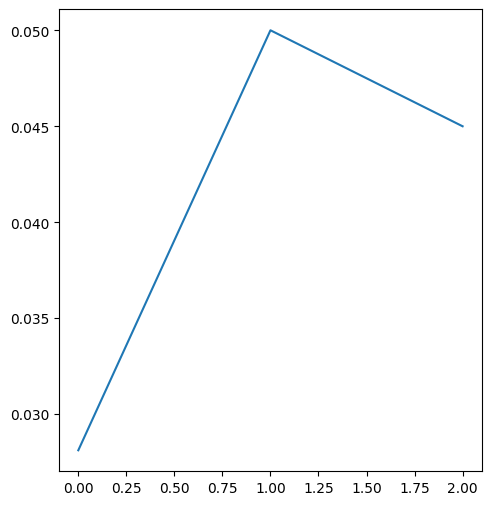

In [4]:
import matplotlib.pyplot as plt
# Example of preparing data generators
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    directory='drive/MyDrive/train/train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

history = model.fit(train_generator, steps_per_epoch=50, epochs=3)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


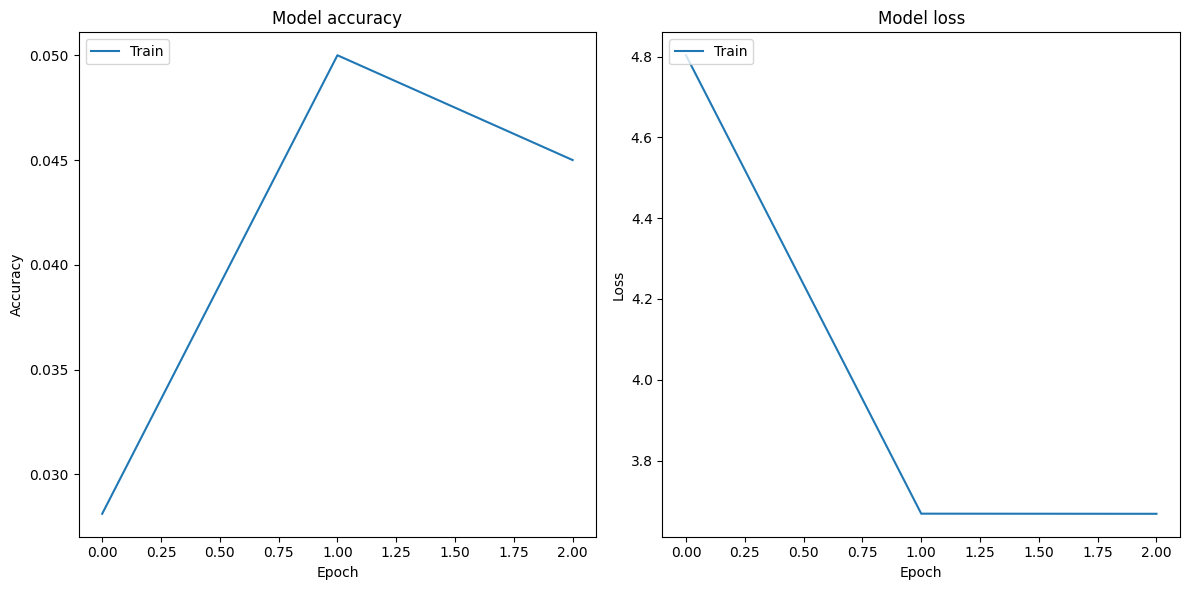

In [5]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
